# This notebook is for multivariable LinearRegression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('multi homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,5.0,8,810000


## Fill missing values
    In this case we fill NaN value with median of perticular colum.

In [3]:
# Find median of badrooms colum using median method
median_bedrooms = df.bedrooms.median()
median_bedrooms

4.0

In [4]:
df.bedrooms.fillna(median_bedrooms,inplace=True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,5.0,8,810000


## Train ML Model

In [5]:
# Create regression 
reg = linear_model.LinearRegression()

In [6]:
# Train Data using fit method
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [7]:
# EX. price = m1*area + m2*bedrooms + m3*age + b
# Here m1,m2 and m3 are coefficients and b is intersept
print(reg.coef_)
print(reg.intercept_)

[   189.57096766 -94877.34896436 -13068.36933232]
595770.0169938181


## Test ML Model

In [8]:
reg.predict([[4000,5,8]])

array([775120.18816344])

## Predict price for original valus means check accuracy of model

In [9]:
df2 = pd.DataFrame(zip(df.area,df.bedrooms,df.age))
df2

,0,1,2
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,5.0,8


In [10]:
df2 = df[['area','bedrooms','age']]
df2

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,5.0,8


In [11]:
predict_price = reg.predict(df2)
predict_price

array([542655.09937689, 588947.9841391 , 587657.06967465, 601542.37371623,
       775120.18816344, 794077.28492969])

In [12]:
df['predict_price'] = predict_price
df

,area,bedrooms,age,price,predict_price
0,2600,3.0,20,550000,542655.099377
1,3000,4.0,15,565000,588947.984139
2,3200,4.0,18,610000,587657.069675
3,3600,3.0,30,595000,601542.373716
4,4000,5.0,8,760000,775120.188163
5,4100,5.0,8,810000,794077.284930


### This is show differance between actual value and predictable value of house
    Here line chart show actual value of house and scatter chart show predictable value.

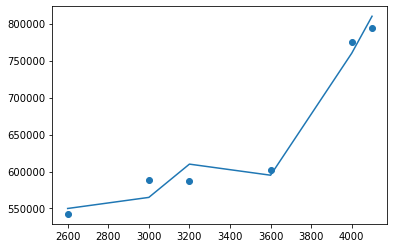

In [13]:
%matplotlib inline
plt.plot(df.area,df.price)
plt.scatter(df.area,df.predict_price)